<a href="https://colab.research.google.com/github/dasunkasthury/DL_num_recog/blob/Iris_recognition/Face_detection_with_lable_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!gdown --id 1cZLKWW-OGZdpd_dYwpcwfvT568rcBAdY
!mkdir data
!unzip '/content/data.zip' -d '/content/data/'
!rm -r data.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cZLKWW-OGZdpd_dYwpcwfvT568rcBAdY
To: /content/data.zip
100% 7.14M/7.14M [00:00<00:00, 49.3MB/s]
Archive:  /content/data.zip
   creating: /content/data/data/
   creating: /content/data/label/
  inflating: /content/data/label/346b147e-920e-11ef-883d-141333359ea4.json  
  inflating: /content/data/label/d7ab96e9-9210-11ef-b6ab-141333359ea4.json  
  inflating: /content/data/label/d803bbf8-9210-11ef-bcf5-141333359ea4.json  
  inflating: /content/data/label/d8529679-9210-11ef-ae63-141333359ea4.json  
  inflating: /content/data/label/d8a3d1ad-9210-11ef-8fbd-141333359ea4.json  
  inflating: /content/data/label/d8f3dc86-9210-11ef-a870-141333359ea4.json  
  inflating: /content/data/label/d9427c1b-9210-11ef-9857-141333359ea4.jso

In [3]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import os
import albumentations as alb
import time
import uuid
import cv2

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
images = tf.data.Dataset.list_files('/content/data/train/images/*.jpg', shuffle=False)

In [7]:
images.as_numpy_iterator().next()

b'/content/data/train/images/d7ab96e9-9210-11ef-b6ab-141333359ea4.jpg'

In [8]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [10]:
images = images.map(load_image)

array([[[113, 104,  87],
        [114, 105,  88],
        [114, 107,  88],
        ...,
        [245, 250, 244],
        [243, 248, 244],
        [242, 247, 243]],

       [[113, 104,  87],
        [114, 105,  88],
        [113, 106,  87],
        ...,
        [243, 248, 242],
        [243, 248, 244],
        [243, 248, 244]],

       [[112, 103,  86],
        [113, 104,  87],
        [112, 105,  86],
        ...,
        [242, 247, 241],
        [243, 248, 244],
        [244, 249, 245]],

       ...,

       [[ 80,  69,  83],
        [ 79,  69,  80],
        [ 84,  74,  83],
        ...,
        [102,  83,  66],
        [104,  86,  66],
        [105,  87,  67]],

       [[104,  96, 107],
        [119, 114, 121],
        [125, 120, 127],
        ...,
        [101,  84,  64],
        [101,  84,  64],
        [100,  83,  63]],

       [[133, 128, 135],
        [129, 124, 131],
        [131, 128, 135],
        ...,
        [102,  85,  65],
        [100,  83,  63],
        [ 96,  79,  59]]], dtype=uint8)
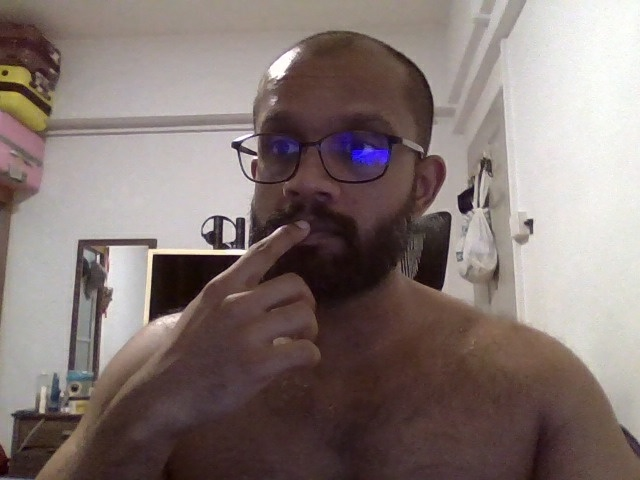

In [11]:
images.as_numpy_iterator().next()

In [12]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [13]:
image_generator = images.batch(4).as_numpy_iterator()

In [14]:
plot_images = image_generator.next()

In [15]:
plot_images.shape

(4, 480, 640, 3)

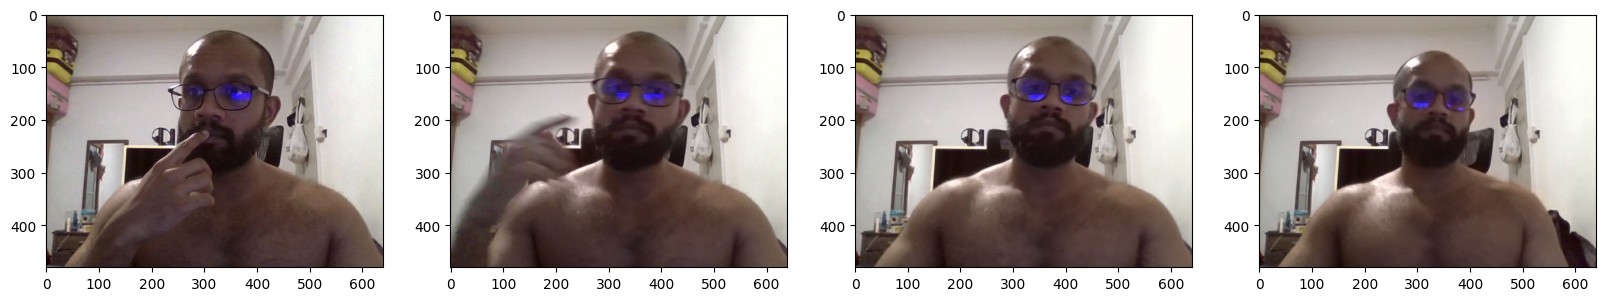

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [ ]:
81*.7
# 57 to train
81*.15
# 12 for test and validade each

12.15

In [4]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('/content/data/', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('/content/data/','label', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('/content/data/',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [5]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))

In [19]:
img = cv2.imread(os.path.join('/content','data','train', 'images','d7ab96e9-9210-11ef-b6ab-141333359ea4.jpg'))

In [20]:
img.shape

(480, 640, 3)

with open(os.path.join('content','data','train', 'labels','d7ab96e9-9210-11ef-b6ab-141333359ea4.json'), 'r') as f:
    label = json.load(f)

In [21]:
#/content/data/train/labels/d7ab96e9-9210-11ef-b6ab-141333359ea4.json
with open(os.path.join('/content', 'data', 'train', 'labels', 'd7ab96e9-9210-11ef-b6ab-141333359ea4.json'), 'r') as f:
    label = json.load(f)

In [22]:
label['shapes'][0]['label']

'face'

In [23]:
label['shapes'][0]['points']

[[250.09708737864077, 29.32038834951458],
 [445.2427184466019, 304.56310679611653]]

In [24]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [25]:
coords

[250.09708737864077, 29.32038834951458, 445.2427184466019, 304.56310679611653]

In [26]:
coords = list(np.divide(coords, [640,480,640,480]))

In [27]:
coords

[0.3907766990291262,
 0.061084142394822044,
 0.6956917475728155,
 0.6345064724919094]

In [28]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [29]:
augmented['bboxes'][0][2:]

[0.7353398132324219, 0.9637324688169692]

In [30]:
augmented['bboxes']

[[0.3016828240288629,
  0.3520819939507378,
  0.7353398132324219,
  0.9637324688169692]]

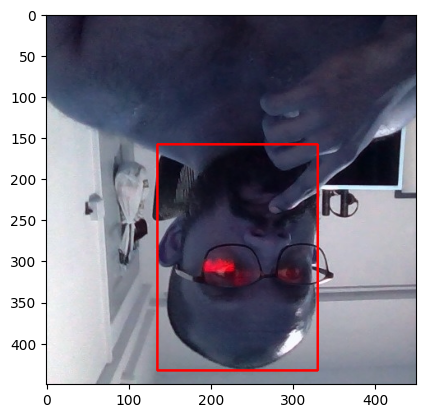

In [31]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [6]:
for partition in ['train','test','val']:
    for image in os.listdir(os.path.join('/content/data/', partition, 'images')):
        img = cv2.imread(os.path.join('/content/data/', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('/content/data/', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('/content/data/aug_data/', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0


                with open(os.path.join('/content/data/aug_data/', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.41049758 0.08737864 0.41049758 0.0894013  0.        ].
x_max is less than or equal to x_min for bbox [0.38698423 0.13389967 0.38698423 0.1197411  0.        ].
x_max is less than or equal to x_min for bbox [0.42945996 0.19660194 0.42870146 0.1986246  0.        ].


In [66]:
#!zip -r '/content/file.zip' '/content/data' # this is to zip the data folder if we need to downloaad it

In [9]:
train_images = tf.data.Dataset.list_files('/content/data/aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [10]:
test_images = tf.data.Dataset.list_files('/content/data/aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [11]:
val_images = tf.data.Dataset.list_files('/content/data/aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [36]:
train_images.as_numpy_iterator().next()

array([[[0.37506127, 0.25594363, 0.24810049],
        [0.38627452, 0.26715687, 0.25931373],
        [0.4264093 , 0.31305146, 0.30306372],
        ...,
        [0.8727328 , 0.8374387 , 0.8070466 ],
        [0.8992034 , 0.85704654, 0.83731616],
        [0.93039215, 0.8872549 , 0.8685049 ]],

       [[0.44693628, 0.31311274, 0.30594364],
        [0.44601715, 0.31219363, 0.3033701 ],
        [0.46243873, 0.3286152 , 0.31979167],
        ...,
        [0.8675858 , 0.83278185, 0.79650736],
        [0.89656866, 0.8544118 , 0.82941175],
        [0.9377451 , 0.8872549 , 0.87892157]],

       [[0.45416668, 0.3206495 , 0.28590685],
        [0.4276348 , 0.2942402 , 0.2591299 ],
        [0.44209558, 0.30870098, 0.27359068],
        ...,
        [0.87892157, 0.847549  , 0.80441177],
        [0.9196078 , 0.877451  , 0.85245097],
        [0.9413603 , 0.8908701 , 0.8776348 ]],

       ...,

       [[0.34313726, 0.28431374, 0.27254903],
        [0.3362745 , 0.27745098, 0.26568627],
        [0.33155638, 0

In [12]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']

In [13]:
train_labels = tf.data.Dataset.list_files('/content/data/aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [14]:
test_labels = tf.data.Dataset.list_files('/content/data/aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [15]:
val_labels = tf.data.Dataset.list_files('/content/data/aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [41]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.525   , 0.011826, 0.9585  , 0.6235  ], dtype=float16))

In [16]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3240, 3240, 720, 720, 720, 720)

In [17]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [18]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [19]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1300)
val = val.batch(8)
val = val.prefetch(4)

In [20]:
train.as_numpy_iterator().next()[0].shape # these are the images of 8 set with 120*120 and 3 means coloured pics

(8, 120, 120, 3)

In [47]:
train.as_numpy_iterator().next()[1] # these are the labes

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.618   , 0.1792  , 0.984   , 0.561   ],
        [0.11383 , 0.3188  , 0.524   , 0.855   ],
        [0.3257  , 0.02689 , 0.809   , 0.738   ],
        [0.127   , 0.1277  , 0.549   , 0.766   ],
        [0.502   , 0.2096  , 1.      , 1.      ],
        [0.1997  , 0.1562  , 0.7725  , 1.      ],
        [0.2319  , 0.014626, 0.727   , 0.7114  ],
        [0.461   , 0.3206  , 0.956   , 1.      ]], dtype=float16))

In [21]:
data_samples = train.as_numpy_iterator()

In [45]:
res = data_samples.next()

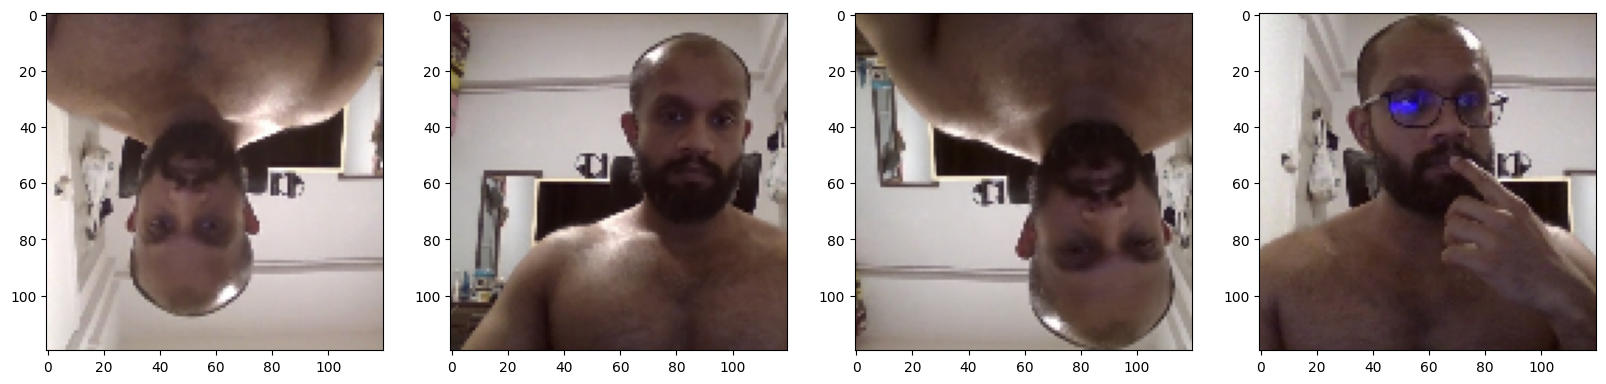

In [46]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    ax[idx].imshow(res[0][idx])
plt.show()


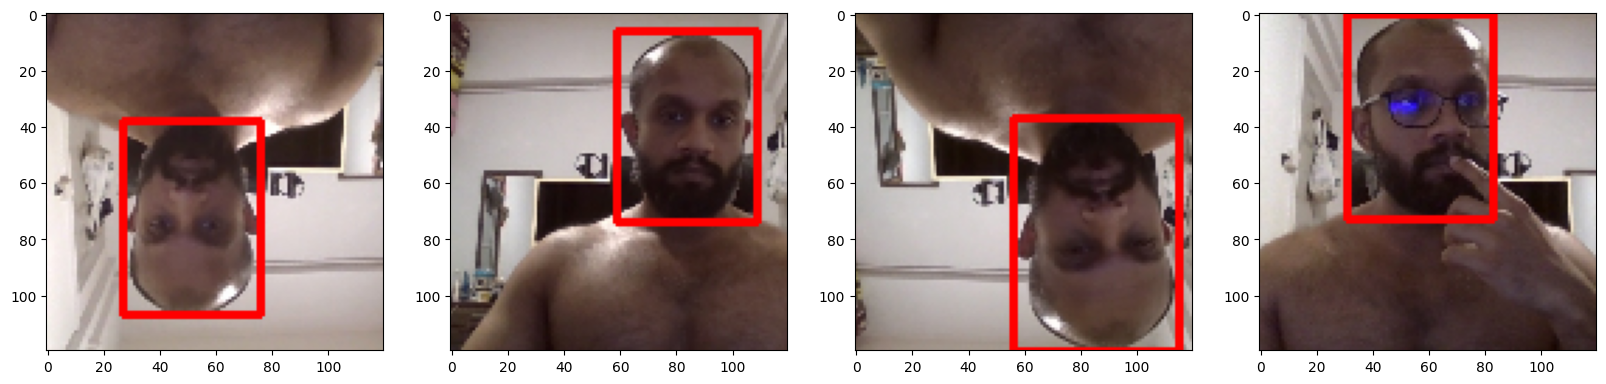

In [48]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
  sample_imagess = res[0][idx].copy()
  sample_coords = res[1][1][idx]

  cv2.rectangle(sample_imagess,
                tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                      (255,0,0), 2)

  ax[idx].imshow(sample_imagess)




In [69]:
augmented['bboxes'][0][2:]

[1.0, 0.8588565105862088]

In [57]:
type(res[0][0])

numpy.ndarray

In [67]:
res[0][0]

array([[[0.36611518, 0.27702206, 0.21078432],
        [0.34607843, 0.26519608, 0.18272059],
        [0.33351716, 0.26145834, 0.18743873],
        ...,
        [0.12420343, 0.0653799 , 0.0536152 ],
        [0.14491421, 0.07579657, 0.07175245],
        [0.1586397 , 0.09264706, 0.08511029]],

       [[0.35704657, 0.27469364, 0.19981618],
        [0.34754902, 0.26617646, 0.19264705],
        [0.3372549 , 0.2627451 , 0.20392157],
        ...,
        [0.13284314, 0.07401961, 0.06127451],
        [0.14620098, 0.0783701 , 0.06176471],
        [0.1713848 , 0.10098039, 0.08474265]],

       [[0.34460783, 0.2740196 , 0.19558823],
        [0.3283701 , 0.25631127, 0.1793505 ],
        [0.34552696, 0.25925246, 0.20435049],
        ...,
        [0.12205882, 0.0632353 , 0.04362745],
        [0.14074755, 0.08192402, 0.05545343],
        [0.15704657, 0.0908701 , 0.07077206]],

       ...,

       [[0.9478554 , 0.93216914, 0.9360907 ],
        [0.9417892 , 0.92610294, 0.92218137],
        [0.94411767, 0

In [68]:
type(augmented['image'])

numpy.ndarray

array([[[ 76, 119, 128],
        [ 76, 119, 128],
        [ 76, 119, 128],
        ...,
        [117, 152, 161],
        [118, 153, 162],
        [120, 155, 164]],

       [[ 74, 117, 126],
        [ 74, 117, 126],
        [ 74, 117, 126],
        ...,
        [117, 152, 161],
        [119, 154, 163],
        [121, 156, 165]],

       [[ 72, 117, 126],
        [ 72, 117, 126],
        [ 72, 117, 126],
        ...,
        [118, 153, 162],
        [119, 154, 163],
        [122, 157, 166]],

       ...,

       [[ 35,  66,  97],
        [ 73, 108, 133],
        [ 99, 137, 155],
        ...,
        [ 46,  77,  98],
        [ 46,  77,  98],
        [ 46,  77,  98]],

       [[ 23,  56,  89],
        [ 45,  80, 107],
        [ 99, 135, 158],
        ...,
        [ 46,  77,  98],
        [ 45,  76,  97],
        [ 45,  76,  97]],

       [[ 19,  51,  86],
        [ 22,  56,  85],
        [ 86, 124, 148],
        ...,
        [ 45,  76,  97],
        [ 44,  75,  96],
        [ 43,  74,  95]]], dtype=uint8)
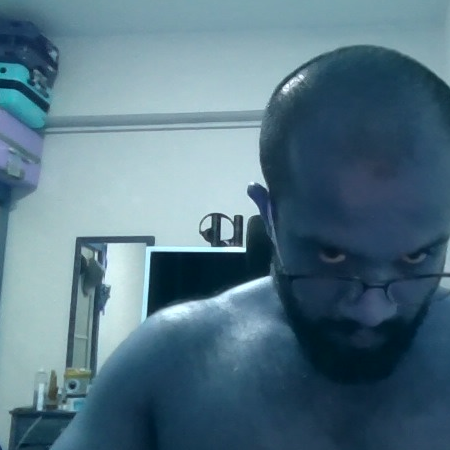

In [60]:
augmented['image']

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [25]:
vgg = VGG16(include_top=False) # originally it used ssd the move to vgg16

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [111]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [28]:
 train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.5205 , 0.3743 , 0.9424 , 0.951  ],
        [0.2769 , 0.05295, 0.715  , 0.711  ],
        [0.1921 , 0.142  , 0.575  , 0.622  ],
        [0.3318 , 0.0346 , 0.787  , 0.6763 ],
        [0.2654 , 0.0897 , 0.669  , 0.685  ],
        [0.3264 , 0.137  , 0.747  , 0.6323 ],
        [0.1726 , 0.09235, 0.5835 , 0.662  ],
        [0.04266, 0.2847 , 0.5205 , 0.9624 ]], dtype=float16))

In [29]:
facetracker = build_model()

In [30]:
facetracker.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 120, 120, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 3, 3, 512)      │     14,714,688 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling2d      │ (None, 512)            │              0 │ vgg16[0][0]            │
│ (GlobalMaxPooling2D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling2d_1    │ (None, 512)            │              0 │ vgg16[0][0]            │
│ (GlobalMaxPooling2D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 2048)           │      1,050,624 │ global_max_pooling2d[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 2048)           │      1,050,624 │ global_max_pooling2d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │          2,049 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 4)              │          8,196 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
X, y = train.as_numpy_iterator().next()

In [50]:
X.shape

(8, 120, 120, 3)

In [76]:
y[1], y[0]

(array([[0.2112 , 0.2634 , 0.7085 , 0.9863 ],
        [0.2073 , 0.368  , 0.618  , 0.931  ],
        [0.3643 , 0.2822 , 0.8477 , 0.993  ],
        [0.4446 , 0.09216, 0.9062 , 0.8096 ],
        [0.1976 , 0.2722 , 0.709  , 0.9844 ],
        [0.3552 , 0.04202, 0.775  , 0.605  ],
        [0.4197 , 0.1785 , 0.9927 , 1.     ],
        [0.3264 , 0.2935 , 0.7817 , 0.9517 ]], dtype=float16),
 array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8))

In [52]:
classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [74]:
classes, coords

(array([[0.36189696],
        [0.33594507],
        [0.39797106],
        [0.42277575],
        [0.32833785],
        [0.3272197 ],
        [0.4027361 ],
        [0.328766  ]], dtype=float32),
 array([[0.35288724, 0.49687016, 0.40645993, 0.6556549 ],
        [0.2417894 , 0.57046306, 0.37495157, 0.64999664],
        [0.31149283, 0.5212154 , 0.41362175, 0.6903354 ],
        [0.27805918, 0.5700327 , 0.4096517 , 0.71257013],
        [0.29690307, 0.48883373, 0.372223  , 0.6515756 ],
        [0.3261193 , 0.627293  , 0.3266618 , 0.74944556],
        [0.2900247 , 0.5109649 , 0.3596612 , 0.6894143 ],
        [0.3121714 , 0.45380697, 0.32937256, 0.6624214 ]], dtype=float32))

In [54]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [55]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [56]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [57]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [58]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.613195>

In [59]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0177764>

In [60]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.613195>

In [151]:
class FaceTracker(Model):
    def __init__(self, facetracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = facetracker
        print("This is called --> __init__")

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
        print("This is called --> compile")

    def train_step(self, batch, **kwargs):

        input_layer = Input(shape=(120,120,3))

        X, y = batch
        print("Input shape:", X.shape)
        print("f.shape(X)[0]:", tf.shape(X)[0])
        print("Classes shape:", y[0].shape)
        print("Coordinates shape:", y[1].shape)
        print("train.as_numpy_iterator().next()[0].shape    :", batch)



        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            print("Classes output shape:", classes.shape)
            print("Coordinates output shape:", coords.shape)

            y[0].set_shape([None,1])

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss+(0.5*batch_classloss)

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)
        y[0].set_shape([None,1])

        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [152]:
model = FaceTracker(facetracker)

This is called --> __init__


In [153]:
model.compile(opt, classloss, regressloss)

This is called --> compile


In [154]:
logdir='logs'

In [155]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) # fit is going to trigger def train_step(self, batch, **kwargs):

In [ ]:
hist = model.fit(train.take(100), epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
Input shape: (None, 120, 120, None)
f.shape(X)[0]: Tensor("strided_slice:0", shape=(), dtype=int32)
Classes shape: <unknown>
Coordinates shape: <unknown>
train.as_numpy_iterator().next()[0].shape    : (<tf.Tensor 'data:0' shape=(None, 120, 120, None) dtype=float32>, (<tf.Tensor 'data_1:0' shape=<unknown> dtype=uint8>, <tf.Tensor 'data_2:0' shape=<unknown> dtype=float16>))
Classes output shape: (None, 1)
Coordinates output shape: (None, 4)
100/100 ━━━━━━━━━━━━━━━━━━━━ 587s 6s/step - class_loss: 1.4534e-04 - regress_loss: 0.0392 - total_loss: 0.0392 - val_class_loss: 2.1795e-05 - val_regress_loss: 0.1881 - val_total_loss: 0.1881
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 578s 6s/step - class_loss: 3.7946e-05 - regress_loss: 0.0276 - total_loss: 0.0276 - val_class_loss: 2.0203e-05 - val_regress_loss: 0.0196 - val_total_loss: 0.0196
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 622s 6s/step - class_loss: 1.9899e-05 - regress_loss: 0.0194 - total_loss: 0.0194 - val_class_loss: 1.0440e-05 

In [71]:
print("Input shape:", X.shape)
print("Classes shape:", y[0].shape)
print("Coordinates shape:", y[1].shape)
print("This is called")

Input shape: (8, 120, 120, 3)
Classes shape: (8, 1)
Coordinates shape: (8, 4)
This is called


In [119]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [143]:
p, q = train.as_numpy_iterator().next()

In [144]:
clz, codinate = facetracker.predict(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [145]:
print('checking classloss {}'.format(classloss(q[0], clz)))
print('in classloss, the y was {} and y[0] was {}'.format(q,q[0]))

checking classloss 0.9170830249786377
in classloss, the y was (array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8), array([[0.4355 , 0.1033 , 0.882  , 0.6396 ],
       [0.4763 , 0.0709 , 0.896  , 0.634  ],
       [0.278  , 0.3125 , 0.689  , 0.9253 ],
       [0.3855 , 0.398  , 0.7686 , 0.878  ],
       [0.1758 , 0.0842 , 0.6753 , 0.8525 ],
       [0.4766 , 0.01791, 0.9414 , 0.72   ],
       [0.3992 , 0.02068, 0.907  , 0.737  ],
       [0.3203 , 0.1876 , 0.82   , 0.9556 ]], dtype=float16)) and y[0] was [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
